In [5]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Load the dataset for
file_path1 = '/content/1 (1).csv'
data_trans = pd.read_csv(file_path1)
file_path2 = '/content/emotion (1).csv'
data_emot = pd.read_csv(file_path2)


In [22]:
# Basic Information

# Display the first few(5) rows of the dataset
print(data_trans.head())

# Display summary of the dataset
print(data_trans.info())

# Show basic statistics
print(data_trans.describe(include='all'))


   id  seek  start    end                                               text  \
0   0     0   0.00   5.56   Hello, I am Jeffrey Shepherd and I am current...   
1   1     0   5.56   9.60   IIM Coikode. I have completed my B.Tech in Bi...   
2   2     0   9.60  14.48   Technology Kolkata, followed by my M.Tech fro...   
3   3     0  14.48  18.48   of three years in the regulatory affairs doma...   
4   4     0  18.48  23.28   as a medical writer in Ciro Klein Farm, Mumba...   

                                              tokens  temperature  \
0  [50364, 2425, 11, 286, 669, 1587, 84, 2938, 49...          0.0   
1  [50642, 286, 6324, 3066, 1035, 1429, 13, 286, ...          0.0   
2  [50844, 15037, 26137, 74, 3274, 11, 6263, 538,...          0.0   
3  [51088, 295, 1045, 924, 294, 264, 18260, 17478...          0.0   
4  [51288, 382, 257, 4625, 9936, 294, 383, 5182, ...          0.0   

   avg_logprob  compression_ratio  no_speech_prob  positive  negative  \
0    -0.447179           1.6512

In [28]:
# Display the first few(5) rows of the dataset
print(data_emot.head())

# Display summary of the dataset
print(data_emot.info())

# Show basic statistics
print(data_emot.describe(include='all'))

# Statistical Summary:

# The mean values of emotions like anger (14.45), fear (18.38), and neutral (38.36) show that neutral and fear have relatively higher probabilities,
#indicating they might be more common emotions across the dataset.Maximum values show that some emotions like surprise (97.83) and fear (94.98) reach extremely high probabilities in certain images.
#Standard deviation is quite high for emotions like neutral (33.47), fear (25.07), and surprise (19.62), indicating high variability across the dataset.

                               movie_id  image_seq     angry   disgust  \
0  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          0   4.31735  0.000594   
1  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          1  53.22530  2.981640   
2  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          2   8.79651  0.029468   
3  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          3   9.45303  0.106778   
4  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          4  56.00020  0.000004   

        fear     happy        sad   surprise   neutral dominant_emotion  
0   2.879790   1.65035   2.779980   0.600814  87.77110          neutral  
1  12.736800   1.52347   1.051320  27.216800   1.26462            angry  
2   2.968160  16.83150  39.884600   0.279335  31.21050              sad  
3   1.553080  20.93010   3.503870   0.909426  63.54370          neutral  
4   0.162231   5.58358   0.197026  12.807600  25.24940            angry  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Col

 Missing Values: There are no missing values in any of the columns, which means the dataset is complete and ready for analysis.

 Statistical Summary:

 The mean values of emotions like anger (14.45), fear (18.38), and neutral (38.36) show that neutral and fear have relatively higher probabilities,
indicating they might be more common emotions across the dataset.Maximum values show that some emotions like surprise (97.83) and fear (94.98) reach extremely high probabilities in certain images.
Standard deviation is quite high for emotions like neutral (33.47), fear (25.07), and surprise (19.62), indicating high variability across the dataset.

movie_id            0
image_seq           0
angry               0
disgust             0
fear                0
happy               0
sad                 0
surprise            0
neutral             0
dominant_emotion    0
dtype: int64


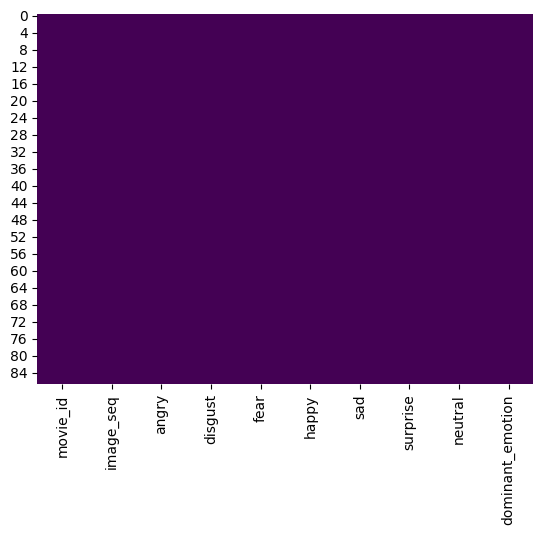

In [24]:
# Check for missing values
print(data_emot.isnull().sum())

# Visualize missing values if necessary
sns.heatmap(data_emot.isnull(), cbar=False, cmap='viridis')
plt.show()


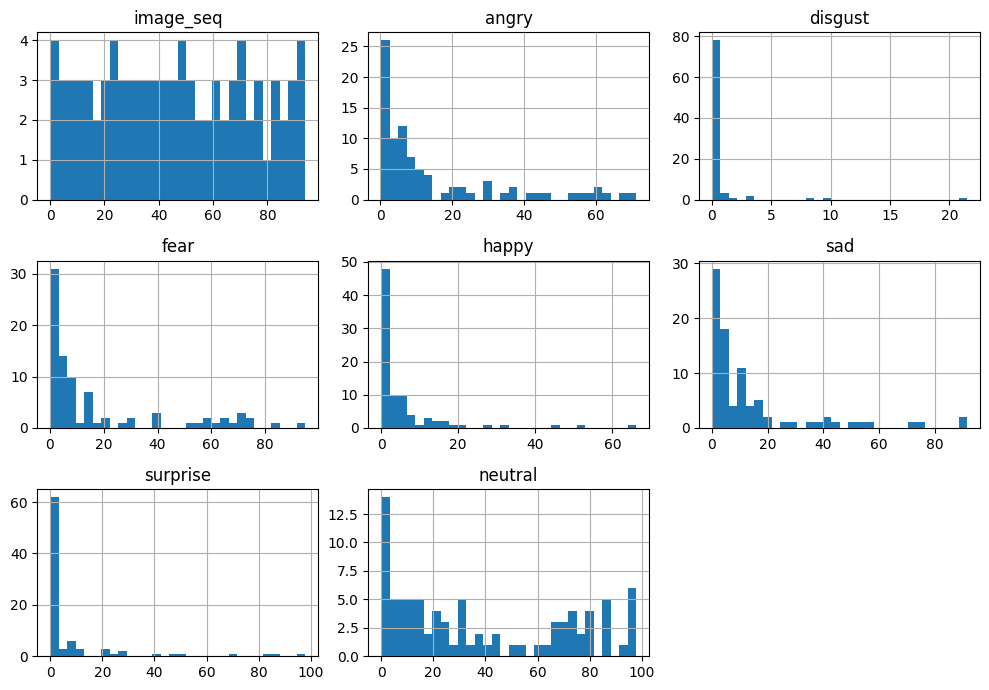

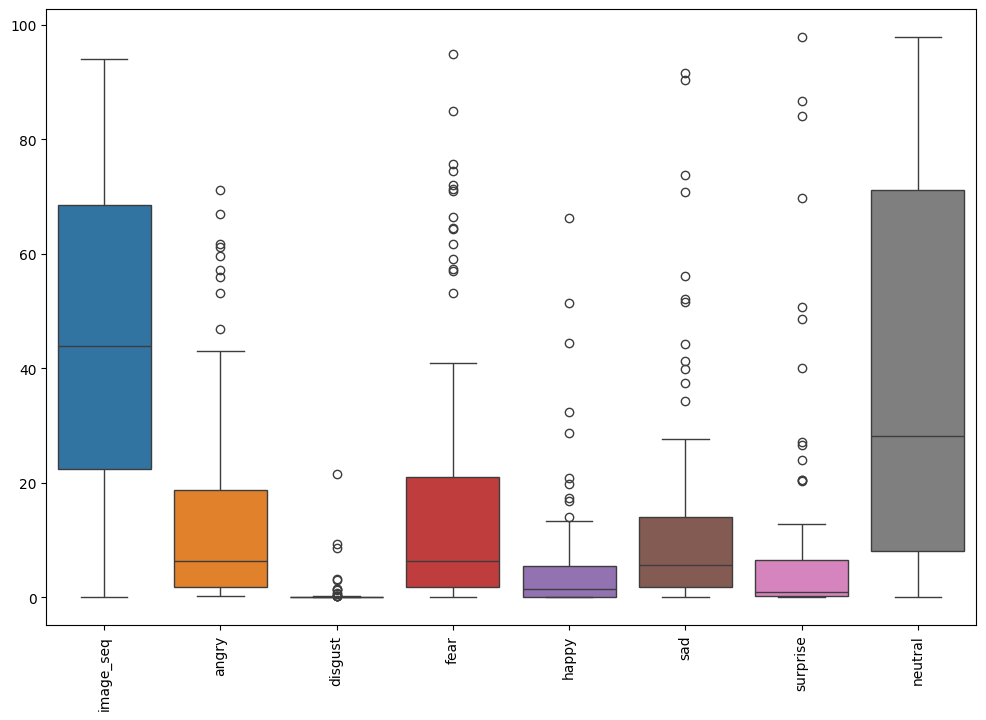

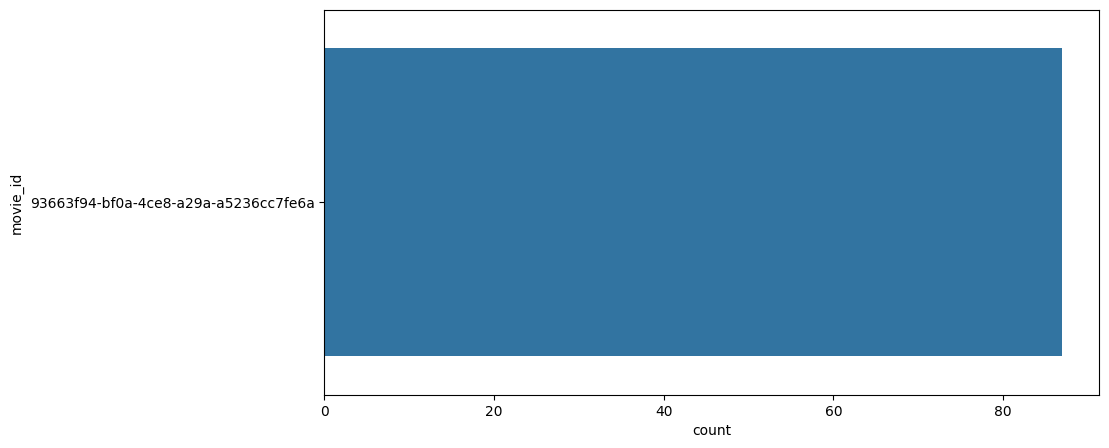

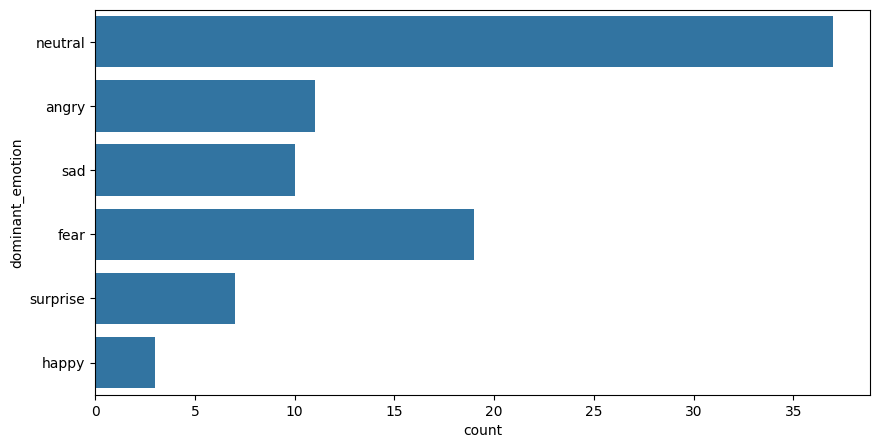

In [27]:
# Data Distribution and Visualization

# Distribution of numerical features
data_emot.hist(bins=30, figsize=(10, 7))
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_emot)
plt.xticks(rotation=90)
plt.show()

# Distribution of categorical features
for column in data_emot.select_dtypes(include='object'):
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=data_emot)
    plt.show()


 Emotion Ranges:

Angry: Ranges from 0.16% to 71.17%.
Disgust: Small values from nearly 0 to 21.51%.
Fear: Has a wide range from 0.07% to 94.98%.
Happy: Ranges from 0.000005% to 66.22%.
Sad: From 0.000073% to 91.56%.
Neutral: From 0.0001% to 97.82%.

<Figure size 1400x800 with 0 Axes>

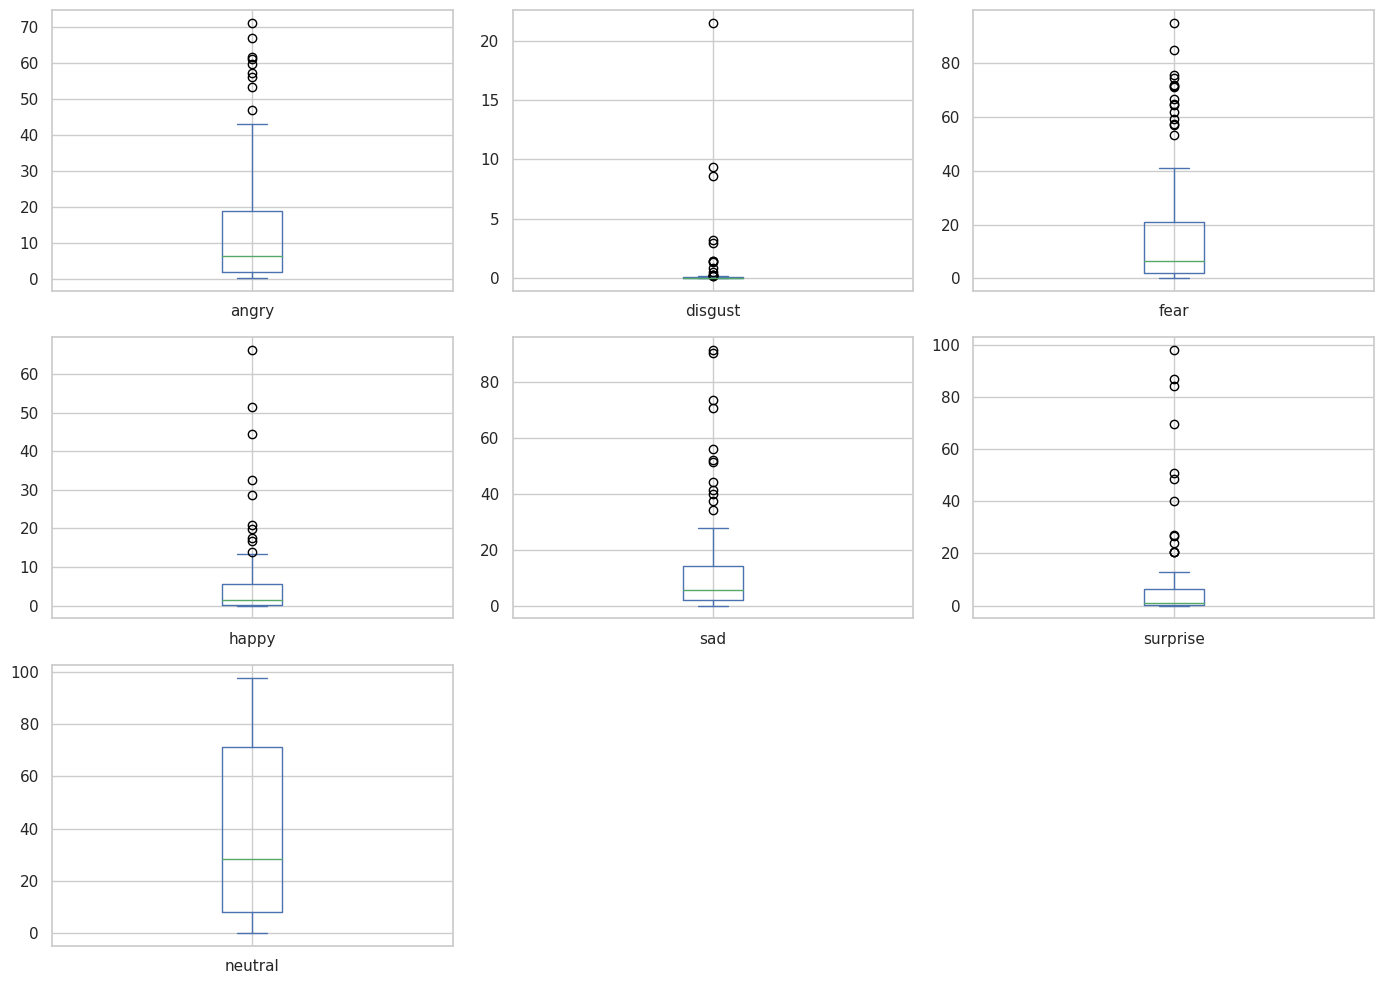

In [31]:
# Analyzing the distribution of emotions across the dataset.

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size and style
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot the distribution of each emotion
emotion_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
data_emot[emotion_columns].plot(kind='box', subplots=True, layout=(3, 3), figsize=(14,10), sharex=False, sharey=False)

plt.tight_layout()
plt.show()


Box Plots: This will generate box plots for each emotion to show the distribution, outliers, and variability. It gives an overview of how each emotion is distributed across the dataset.

<ipython-input-32-cda89470677c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dominant_emotion_counts.index, y=dominant_emotion_counts.values, palette="viridis")


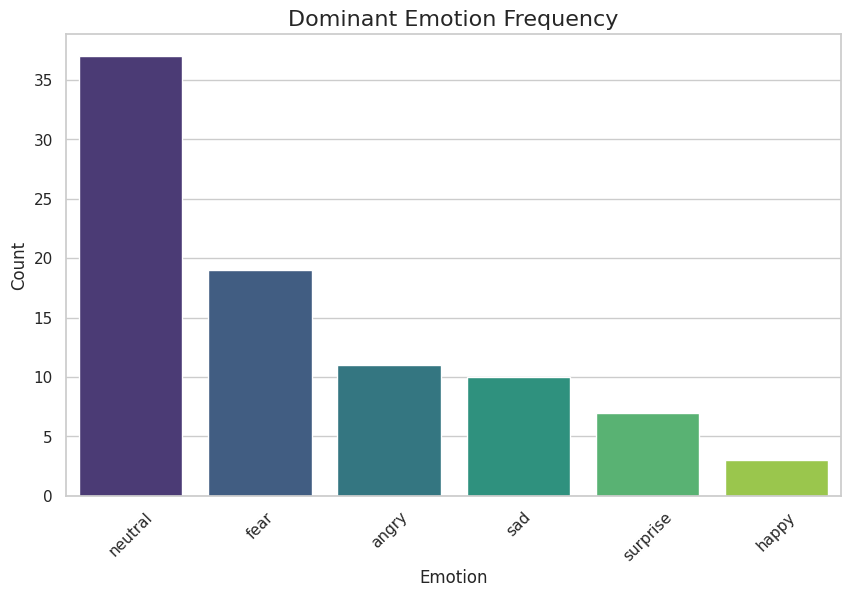

In [32]:

# Count the occurrences of each dominant emotion
dominant_emotion_counts = data_emot['dominant_emotion'].value_counts()

# Plotting the frequency of dominant emotions
plt.figure(figsize=(10, 6))
sns.barplot(x=dominant_emotion_counts.index, y=dominant_emotion_counts.values, palette="viridis")
plt.title('Dominant Emotion Frequency', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


A bar chart displaying how often each emotion is the dominant one across the dataset.

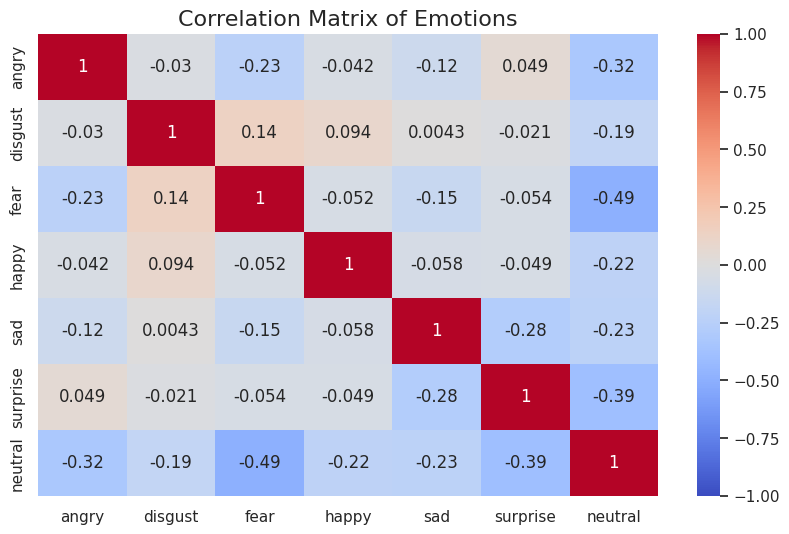

In [33]:
# Analyze Correlations between Emotions:

# Select emotion columns to explore correlations
emotion_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Compute the correlation matrix
correlation_matrix = data[emotion_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Emotions', fontsize=16)
plt.show()

Heatmap: A heatmap will visually represent these correlations, where:
A value close to 1 indicates a strong positive correlation.
A value close to -1 indicates a strong negative correlation.
A value near 0 means no correlation.

Objective for performing all this EDA on our dataset :

Target Variable Definition:

 we can Create a hired column based on emotions, which we could further Define a logical rule for creating a target variable based on the emotions. For instance, you might assume candidates with high "happy" or "neutral" values are more likely to be hired, while those with higher "angry" or "sad" values are less likely..

EDA:

 Analyze the relationship between emotions and the target (hired/not_hired).
Feature Engineering: Create new features like dominant emotions or aggregate positive/negative emotions.

Predictive Modeling:

 By Using machine learning algorithms (e.g., Logistic Regression, Decision Trees) we can predict the hiring outcome based on emotions.